In [1]:
#Packages related to general operating system & warnings
import os 
import warnings
warnings.filterwarnings('ignore')

#Packages related to data importing, manipulation, exploratory data analysis, data understanding
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import pandas_profiling
import scipy.stats as stats

#Packages related to data visualizaiton
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Setting plot sizes and type of plot
plt.rc("font", size=14)
plt.rcParams['axes.grid'] = True
plt.figure(figsize=(6,3))
plt.gray()

from matplotlib.backends.backend_pdf import PdfPages

#Modules related to split the data & gridsearch
from sklearn.model_selection import train_test_split, GridSearchCV

#Module related to calculation of metrics
from sklearn import metrics

#Module related to VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Modules related to preprocessing (Imputation of missings, standardiszation, new features creation, converting categorical to numerical)
from sklearn.impute import MissingIndicator, SimpleImputer
#from sklearn.preprocessing import Imputer, PolynomialFeatures, KBinsDiscretizer, FunctionTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, LabelBinarizer, OrdinalEncoder

#Moudles related to feature selection
from sklearn.feature_selection import RFE, RFECV, SelectKBest, chi2, SelectPercentile, f_classif, mutual_info_classif, f_regression, VarianceThreshold, SelectFromModel, mutual_info_classif, mutual_info_regression, SelectFpr, SelectFdr, SelectFwe


#Modules related to pipe line creation for faster processing
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
#from sklearn.features.transformers import DataFrameSelector

#Modules related to saving python objects permanantly
#from sklearn.externals import joblib

#Dumping model into current directory: joblib.dump(model_xg,"my_model.pkl") 
#Loading model: my_model_loaded=joblib.load("my_model.pkl")

#Modules related key techniques of supervised learning 
import statsmodels.formula.api as smf
import statsmodels.tsa as tsa

from sklearn.linear_model import LogisticRegression, LinearRegression, ElasticNet, Lasso, Ridge
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor#, export_graphviz, export
from sklearn.ensemble import BaggingClassifier, BaggingRegressor,RandomForestClassifier,RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier,GradientBoostingRegressor, AdaBoostClassifier, AdaBoostRegressor 
from xgboost import XGBClassifier, XGBRegressor
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB
from sklearn.svm import LinearSVC, LinearSVR, SVC, SVR
#from sklearn.neural_network import MLPClassifier, MLPRegressor

from sklearn.metrics import confusion_matrix

<Figure size 600x300 with 0 Axes>

In [2]:
#Load the data
file_path = 'C:/Users/rajsh/OneDrive/Desktop/ML projects/12. Capstone Case Study - Cyber Security Case Study 2/'
q1 = pd.read_csv(file_path + 'Data_of_Attack_Back.csv')
q2 = pd.read_csv(file_path + 'Data_of_Attack_Back_BufferOverflow.csv')
q3 = pd.read_csv(file_path + 'Data_of_Attack_Back_FTPWrite.csv')
q4 = pd.read_csv(file_path + 'Data_of_Attack_Back_GuessPassword.csv')
q5 = pd.read_csv(file_path + 'Data_of_Attack_Back_Neptune.csv')
q6 = pd.read_csv(file_path + 'Data_of_Attack_Back_NMap.csv')
q7 = pd.read_csv(file_path + 'Data_of_Attack_Back_Normal.csv')
q8 = pd.read_csv(file_path + 'Data_of_Attack_Back_PortSweep.csv')
q9 = pd.read_csv(file_path + 'Data_of_Attack_Back_RootKit.csv')
q10 = pd.read_csv(file_path + 'Data_of_Attack_Back_Satan.csv')
q11 = pd.read_csv(file_path + 'Data_of_Attack_Back_Smurf.csv')


In [3]:
import pandas as pd

def merge_and_add_attack_column(q1,q2,q4,q5,q6,q7,q8,q9,q10,q11):
    # Merge the three tables into a final dataset
    df = pd.concat([q1,q2,q4,q5,q6,q7,q8,q9,q10,q11], ignore_index=True)

    # Add a new column 'Attack' based on the name of the table
    df['Attack'] = df.apply(lambda row: get_attack_from_table(row, q1,q2,q4,q5,q6,q7,q8,q9,q10,q11 ), axis=1)

    return df

def get_attack_from_table(row,q1,q2,q4,q5,q6,q7,q8,q9,q10,q11):
    # Check which table the row belongs to and return the attack name accordingly
    if row.name < len(q1):
        return 'Back'
    elif row.name < len(q1) + len(q2):
        return 'BufferOverflow'
    elif row.name < len(q1) + len(q2)+len(q4):
        return 'GuessPassword'
    elif row.name < len(q1) + len(q2)+len(q4)+len(q5):
        return 'Neptune'
    elif row.name < len(q1) + len(q2)+len(q4)+len(q5)+len(q6):
        return 'NMap'
    elif row.name < len(q1) + len(q2)+len(q4)+len(q5)+len(q6)+len(q7):
        return 'Normal'
    elif row.name < len(q1) + len(q2)+len(q4)+len(q5)+len(q6)+len(q7)+len(q8):
        return 'PortSweep'
    elif row.name < len(q1) + len(q2)+len(q4)+len(q5)+len(q6)+len(q7)+len(q8)+len(q9):
        return 'RootKit'
    elif row.name < len(q1) + len(q2)+len(q4)+len(q5)+len(q6)+len(q7)+len(q8)+len(q9)+len(q10):
        return 'Satan'
    else:
        return 'Smurf'


In [4]:
# Assuming you have three tables named 'table1', 'table2', and 'table3'
df = merge_and_add_attack_column(q1,q2,q4,q5,q6,q7,q8,q9,q10,q11)
df.head()
df.tail()


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Attack
817538,0.0,0.02,0.09,0.0,0.01032,0.0,0,0.0,0.0,0.0,...,0.251,0.098,0.001,0.098,0.0,0.0,0.0,0.0,0.0,Smurf
817539,0.0,0.02,0.09,0.0,0.01032,0.0,0,0.0,0.0,0.0,...,0.252,0.099,0.001,0.099,0.0,0.0,0.0,0.0,0.0,Smurf
817540,0.0,0.02,0.09,0.0,0.01032,0.0,0,0.0,0.0,0.0,...,0.253,0.099,0.001,0.099,0.0,0.0,0.0,0.0,0.0,Smurf
817541,0.0,0.02,0.09,0.0,0.01032,0.0,0,0.0,0.0,0.0,...,0.254,0.100,0.001,0.100,0.0,0.0,0.0,0.0,0.0,Smurf
817542,0.0,0.01,0.12,0.0,0.00028,0.0,0,0.3,0.0,0.0,...,0.001,0.000,0.001,0.000,0.0,0.0,0.0,0.0,0.0,Smurf


In [5]:
df.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 817543 entries, 0 to 817542
Data columns (total 42 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   duration                      817543 non-null  float64
 1    protocol_type                817543 non-null  float64
 2    service                      817543 non-null  float64
 3    flag                         817543 non-null  float64
 4    src_bytes                    817543 non-null  float64
 5    dst_bytes                    817543 non-null  float64
 6    land                         817543 non-null  int64  
 7    wrong_fragment               817543 non-null  float64
 8    urgent                       817543 non-null  float64
 9    hot                          817543 non-null  float64
 10   num_failed_logins            817543 non-null  float64
 11   logged_in                    817543 non-null  float64
 12   num_compromised              817543 non-nul

In [6]:
df.columns

Index(['duration', ' protocol_type', ' service', ' flag', ' src_bytes',
       ' dst_bytes', ' land', ' wrong_fragment', ' urgent', ' hot',
       ' num_failed_logins', ' logged_in', ' num_compromised', ' root_shell',
       ' su_attempted', ' num_root', ' num_file_creations', ' num_shells',
       ' num_access_files', ' num_outbound_cmds', ' is_host_login',
       ' is_guest_login', ' count', ' srv_count', ' serror_rate',
       ' srv_error_rate', ' rerror_rate', ' srv_rerror_rate', ' same_srv_rate',
       ' diff_srv_rate', ' srv_diff_host_rate', ' dst_host_count',
       ' dst_host_srv_count', ' dst_host_same_srv_rate',
       ' dst_host_diff_srv_rate', ' dst_host_same_src_port_rate',
       ' dst_host_srv_diff_host_rate', ' dst_host_serror_rate',
       ' dst_host_srv_serror_rate', ' dst_host_rerror_rate',
       ' dst_host_srv_rerror_rate', 'Attack'],
      dtype='object')

In [7]:
# Remove spaces from column names
df.rename(columns=lambda x: x.replace(" ", ""), inplace=True)


In [8]:
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_error_rate',
       'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
       'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
       'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'dst_host_serror_rate', 'dst_host_srv_serror_rate',
       'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'Attack'],
      dtype='object')

In [9]:
df.shape

(817543, 42)

In [10]:
# Creating M_Attack Y variables from dictionary - Normal =0,Back =1,BufferOverflow=2,GuessPassword=3,Neptune=4,NMap=5,PortSweep=6,RootKit=7,Satan=8,Smurf=9
dim={'Normal':0,
 'Back':1,
 'BufferOverflow':2,
 'GuessPassword':3,
 'Neptune':4,
 'NMap':5,
 'PortSweep':6,
 'RootKit':7,
 'Satan':8,
 'Smurf':9}


In [11]:
# Creating B_Attack Y variables from dictionary - normal=0, attack=1
dib={1: 1,
     2: 1,
     3: 1,
     4: 1,
     5: 1,
     6: 1,
     7: 1,
     8: 1,
     9: 1,
     0: 0}

In [12]:
# Create Y Multinomial variable
df['M_Attack']=df['Attack'].map(dim)
df['M_Attack']

0         1
1         1
2         1
3         1
4         1
         ..
817538    9
817539    9
817540    9
817541    9
817542    9
Name: M_Attack, Length: 817543, dtype: int64

In [13]:
# Create Y Binomial variable
df['B_Attack']=df['M_Attack'].map(dib)

In [14]:
# Summary profile
#report = pandas_profiling.ProfileReport(df)
#report.to_file('profiling.html')

In [15]:
# Remove old column & column with no variation as per profiling report
df.drop(["Attack","num_outbound_cmds","land"],axis=1,inplace=True)

In [16]:
# Understanding datasets
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 817543 entries, 0 to 817542
Data columns (total 41 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     817543 non-null  float64
 1   protocol_type                817543 non-null  float64
 2   service                      817543 non-null  float64
 3   flag                         817543 non-null  float64
 4   src_bytes                    817543 non-null  float64
 5   dst_bytes                    817543 non-null  float64
 6   wrong_fragment               817543 non-null  float64
 7   urgent                       817543 non-null  float64
 8   hot                          817543 non-null  float64
 9   num_failed_logins            817543 non-null  float64
 10  logged_in                    817543 non-null  float64
 11  num_compromised              817543 non-null  float64
 12  root_shell                   817543 non-null  float64
 13 

In [17]:
# Check data
display(df.head())
display(df.tail())

,duration,protocol_type,service,flag,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,M_Attack,B_Attack
0,0.0,0.0,0.0,0.0,0.5454,0.08314,0.0,0.0,0.2,0.0,...,0.1,0.0,0.100,0.0,0.0,0.0,0.0,0.0,1,1
1,0.0,0.0,0.0,0.0,0.5454,0.08314,0.0,0.0,0.2,0.0,...,0.1,0.0,0.050,0.0,0.0,0.0,0.0,0.0,1,1
2,0.0,0.0,0.0,0.0,0.5454,0.08314,0.0,0.0,0.2,0.0,...,0.1,0.0,0.033,0.0,0.0,0.0,0.0,0.0,1,1
3,0.0,0.0,0.0,0.0,0.5454,0.08314,0.0,0.0,0.2,0.0,...,0.1,0.0,0.025,0.0,0.0,0.0,0.0,0.0,1,1
4,0.0,0.0,0.0,0.0,0.5454,0.08314,0.0,0.0,0.2,0.0,...,0.1,0.0,0.020,0.0,0.0,0.0,0.0,0.0,1,1


,duration,protocol_type,service,flag,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,M_Attack,B_Attack
817538,0.0,0.02,0.09,0.0,0.01032,0.0,0.0,0.0,0.0,0.0,...,0.098,0.001,0.098,0.0,0.0,0.0,0.0,0.0,9,1
817539,0.0,0.02,0.09,0.0,0.01032,0.0,0.0,0.0,0.0,0.0,...,0.099,0.001,0.099,0.0,0.0,0.0,0.0,0.0,9,1
817540,0.0,0.02,0.09,0.0,0.01032,0.0,0.0,0.0,0.0,0.0,...,0.099,0.001,0.099,0.0,0.0,0.0,0.0,0.0,9,1
817541,0.0,0.02,0.09,0.0,0.01032,0.0,0.0,0.0,0.0,0.0,...,0.100,0.001,0.100,0.0,0.0,0.0,0.0,0.0,9,1
817542,0.0,0.01,0.12,0.0,0.00028,0.0,0.3,0.0,0.0,0.0,...,0.000,0.001,0.000,0.0,0.0,0.0,0.0,0.0,9,1


### EDA

In [18]:
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins',
       'logged_in', 'num_compromised', 'root_shell', 'su_attempted',
       'num_root', 'num_file_creations', 'num_shells', 'num_access_files',
       'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_error_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'M_Attack', 'B_Attack'],
      dtype='object')

In [19]:
col = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins',
       'logged_in', 'num_compromised', 'root_shell', 'su_attempted',
       'num_root', 'num_file_creations', 'num_shells', 'num_access_files',
       'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_error_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate']

In [20]:
# Column segregation

Nomcol = ["protocol_type", "service", "flag"]
Bincol = ["land", "logged_in", "root_shell", "su_attempted", "is_host_login", "is_guest_login"]

Numcol = list(set(col).difference(set(Nomcol).union(set(Bincol))).difference(['B_Attack','M_Attack','Attack','num_outbound_cmds']))

In [21]:
# Distribution of Y Multinomial
df.M_Attack.value_counts()

0    576710
4    227228
8      5019
9      3007
6      2964
5      1554
1       968
3        53
2        30
7        10
Name: M_Attack, dtype: int64

In [22]:
df.M_Attack.value_counts()/df.M_Attack.count()

0    0.705419
4    0.277940
8    0.006139
9    0.003678
6    0.003625
5    0.001901
1    0.001184
3    0.000065
2    0.000037
7    0.000012
Name: M_Attack, dtype: float64

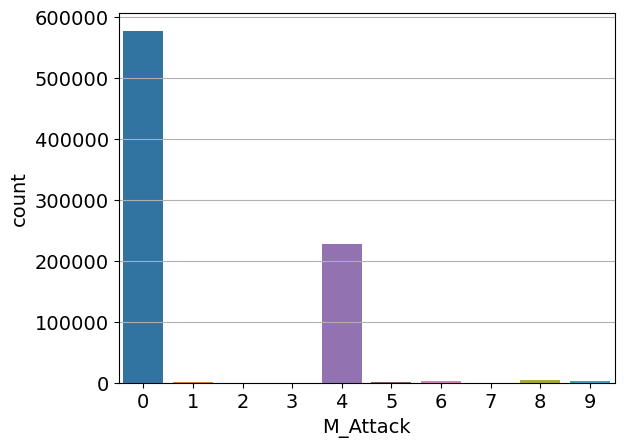

In [23]:
sns.countplot(x="M_Attack", data=df)
plt.show()

In [24]:
# Distribution of Y Binomial
df.B_Attack.value_counts()

0    576710
1    240833
Name: B_Attack, dtype: int64

In [25]:
df.B_Attack.value_counts()/df.B_Attack.count()

0    0.705419
1    0.294581
Name: B_Attack, dtype: float64

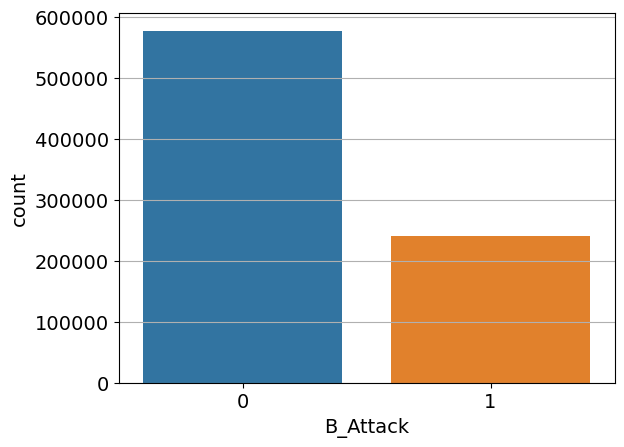

In [26]:
sns.countplot(x="B_Attack", data=df)
plt.show()

In [27]:
# Relationship Y Multinomial
df.groupby('M_Attack').mean()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,B_Attack
M_Attack,,,,,,,,,,,,,,,,,,,,,
0,6.656261e-04,0.000633,0.008531,0.001119,6.069233e-03,3.509754e-02,0.0000,0.000003,0.003135,0.000012,...,0.223275,0.092130,0.001170,0.007539,0.002334,0.000175,0.000076,0.002278,0.002131,0.0
1,2.933884e-05,0.000000,0.000000,0.007531,5.366689e-01,8.129908e-02,0.0000,0.000000,0.191736,0.000000,...,0.146418,0.100000,0.000000,0.002320,0.000000,0.000204,0.000204,0.006356,0.006356,1.0
2,9.170000e-03,0.000000,0.074667,0.002000,1.400433e-02,6.339833e-02,0.0000,0.000000,0.206667,0.000000,...,0.013900,0.100000,0.000000,0.068067,0.007500,0.000000,0.000000,0.002133,0.002133,1.0
3,2.716981e-04,0.000000,0.050000,0.058113,1.253396e-03,2.161887e-03,0.0000,0.000000,0.105660,0.105660,...,0.026038,0.100000,0.000000,0.010528,0.001887,0.010151,0.010151,0.087925,0.087925,1.0
4,8.801732e-10,0.000000,0.162364,0.067819,4.715088e-07,3.872762e-08,0.0000,0.000000,0.000000,0.000000,...,0.011139,0.004448,0.006869,0.000032,0.000014,0.088646,0.088615,0.011346,0.011345,1.0
5,0.000000e+00,0.014569,0.088301,0.019112,3.627156e-04,1.975547e-06,0.0000,0.000000,0.000000,0.000000,...,0.093178,0.076893,0.018001,0.094028,0.016187,0.017488,0.019017,0.000000,0.000000,1.0
6,1.121690e-01,0.000034,0.147652,0.071002,2.708910e-03,1.015611e-03,0.0000,0.000000,0.000270,0.000000,...,0.002172,0.000793,0.047416,0.063281,0.000138,0.004189,0.008034,0.064680,0.089599,1.0
7,1.008000e-02,0.003000,0.076000,0.000000,2.947000e-03,4.276600e-02,0.0000,0.010000,0.020000,0.010000,...,0.006000,0.030600,0.001400,0.025000,0.001000,0.000000,0.002500,0.007300,0.002500,1.0
8,9.523810e-06,0.003531,0.117444,0.034921,3.140068e-05,6.736402e-05,0.0000,0.000000,0.000219,0.000080,...,0.011465,0.004461,0.069685,0.023275,0.000058,0.008263,0.016759,0.057658,0.046312,1.0


In [28]:
# Relationship Y Binomial
df.groupby('B_Attack').mean()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,M_Attack
B_Attack,,,,,,,,,,,,,,,,,,,,,
0,0.000666,0.000633,0.008531,0.001119,0.006069,0.035098,0.000000,2.947755e-06,0.003135,0.000012,...,0.223275,0.092130,0.001170,0.007539,0.002334,0.000175,0.000076,0.002278,0.002131,0.000000
1,0.001382,0.000418,0.159173,0.065756,0.002309,0.000351,0.000001,4.152255e-07,0.000828,0.000025,...,0.014088,0.006124,0.008672,0.002813,0.000122,0.083991,0.084183,0.012781,0.012818,4.164454


In [29]:
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins',
       'logged_in', 'num_compromised', 'root_shell', 'su_attempted',
       'num_root', 'num_file_creations', 'num_shells', 'num_access_files',
       'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_error_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'M_Attack', 'B_Attack'],
      dtype='object')

In [30]:
Nomcol

['protocol_type', 'service', 'flag']

In [31]:
Bincol

['land',
 'logged_in',
 'root_shell',
 'su_attempted',
 'is_host_login',
 'is_guest_login']

In [32]:
Numcol

['num_access_files',
 'srv_diff_host_rate',
 'serror_rate',
 'dst_host_same_srv_rate',
 'num_shells',
 'wrong_fragment',
 'srv_error_rate',
 'hot',
 'srv_rerror_rate',
 'num_failed_logins',
 'dst_host_same_src_port_rate',
 'dst_host_count',
 'same_srv_rate',
 'duration',
 'dst_host_serror_rate',
 'srv_count',
 'dst_bytes',
 'dst_host_diff_srv_rate',
 'dst_host_srv_serror_rate',
 'num_file_creations',
 'dst_host_srv_diff_host_rate',
 'dst_host_rerror_rate',
 'num_compromised',
 'src_bytes',
 'dst_host_srv_count',
 'urgent',
 'rerror_rate',
 'count',
 'diff_srv_rate',
 'dst_host_srv_rerror_rate',
 'num_root']

In [33]:
#df1 = pd.get_dummies(df, columns = [' flag', ' protocol_type'] , drop_first = True)

In [34]:
#df1.columns

In [35]:
##missing value
#def missing_treat(x):
    #x = x.fillna(x.median())
    #return x

#Handling outliers
#def outlier_capping(x):
    #x = x.clip(upper = x.quantile(0.99) , lower = x.quantile(0.01))
    #return x
##df2 = df1.apply(lambda x: missing_treat(x))
#df2 = df1.apply(lambda x: outlier_capping(x))

In [36]:
#X = df1[df1.columns.difference(['B_Attack', 'M_Attack'])]

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 817543 entries, 0 to 817542
Data columns (total 41 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     817543 non-null  float64
 1   protocol_type                817543 non-null  float64
 2   service                      817543 non-null  float64
 3   flag                         817543 non-null  float64
 4   src_bytes                    817543 non-null  float64
 5   dst_bytes                    817543 non-null  float64
 6   wrong_fragment               817543 non-null  float64
 7   urgent                       817543 non-null  float64
 8   hot                          817543 non-null  float64
 9   num_failed_logins            817543 non-null  float64
 10  logged_in                    817543 non-null  float64
 11  num_compromised              817543 non-null  float64
 12  root_shell                   817543 non-null  float64
 13 

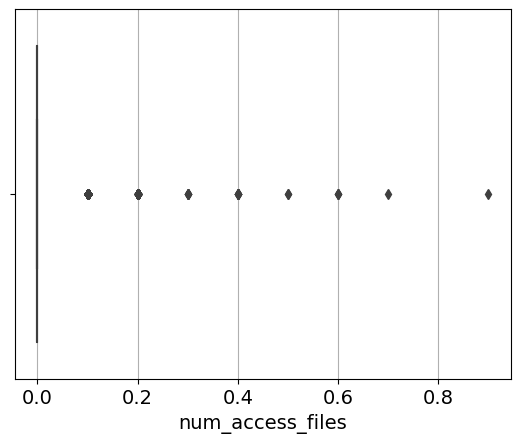

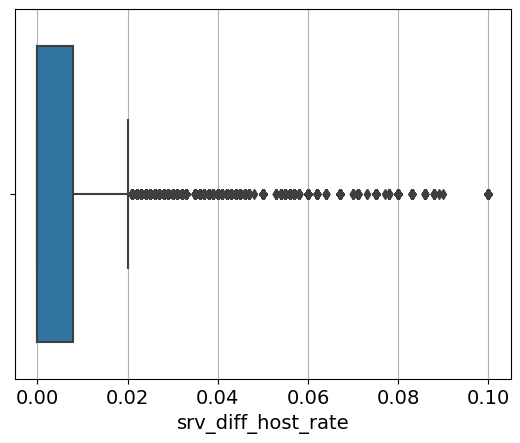

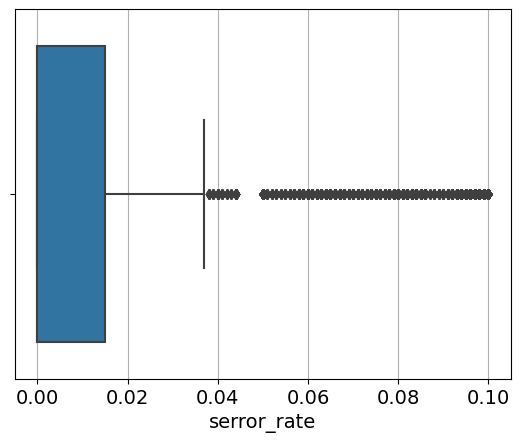

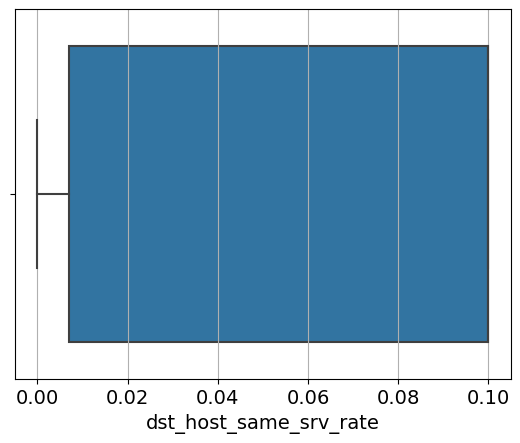

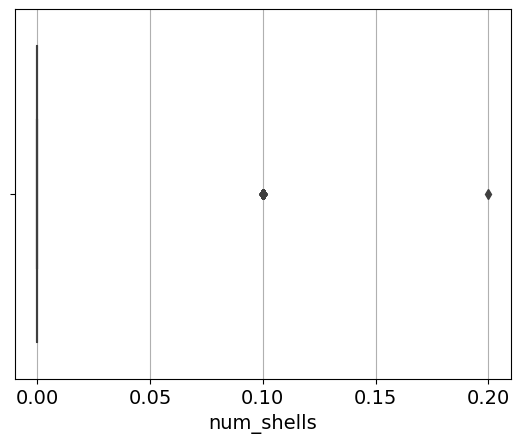

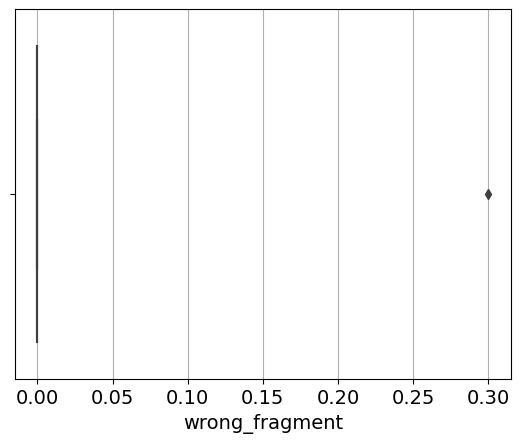

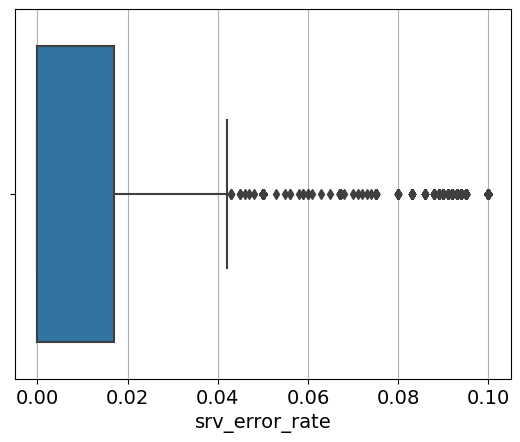

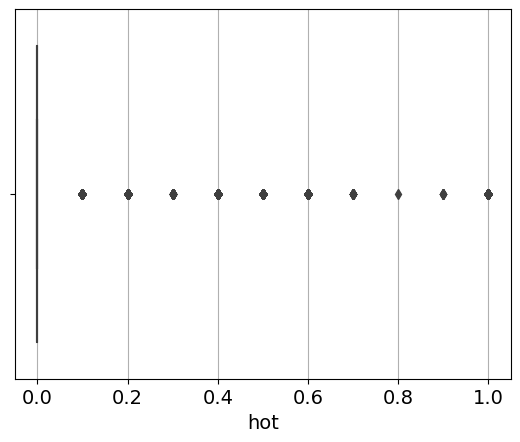

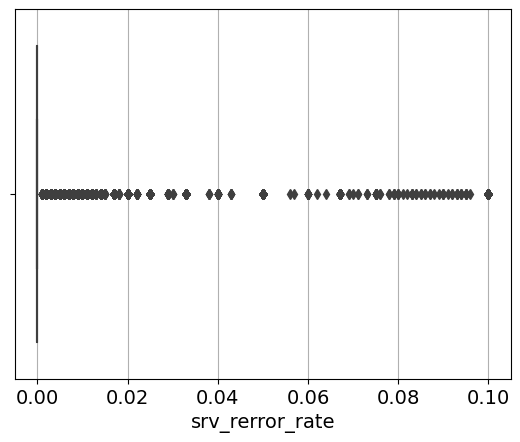

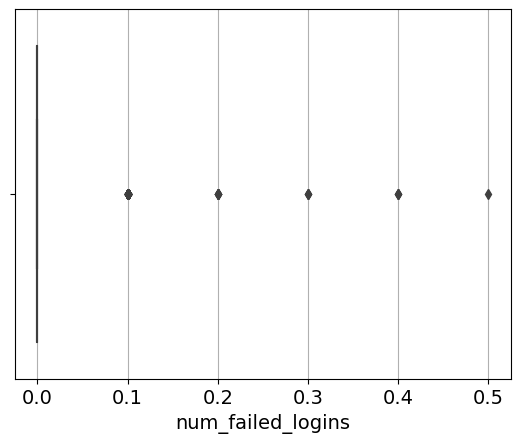

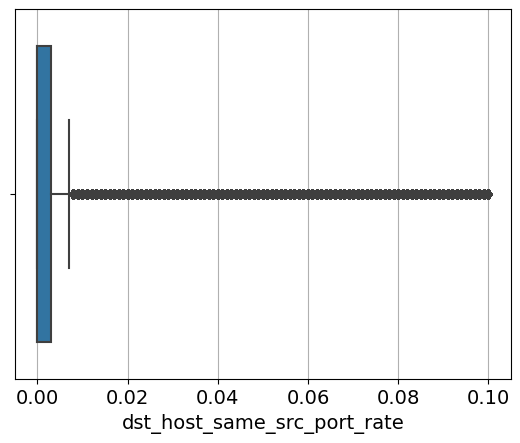

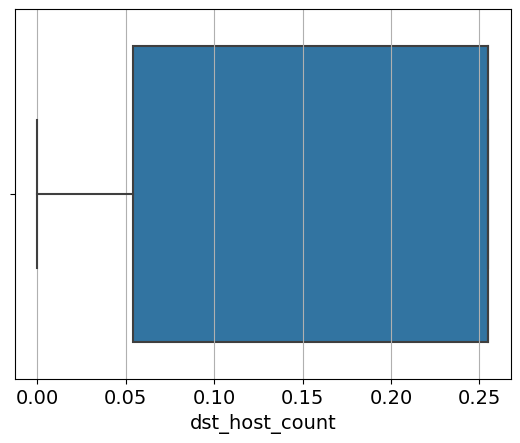

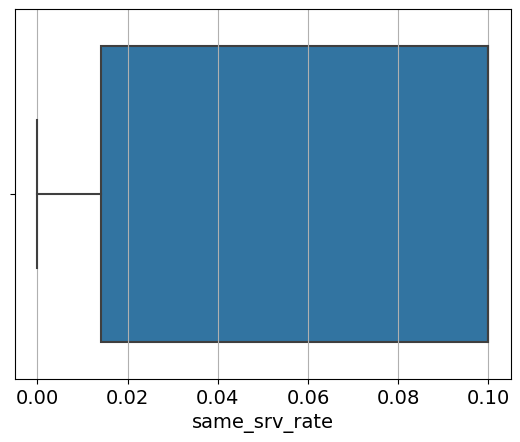

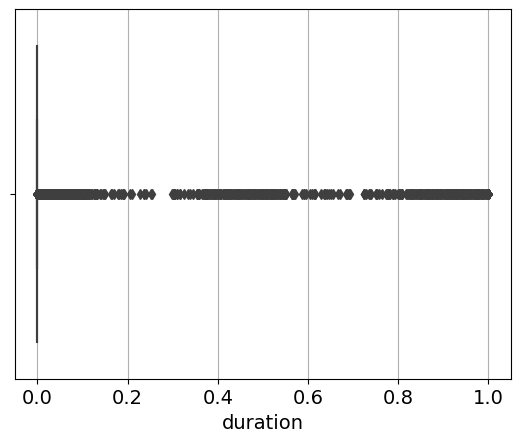

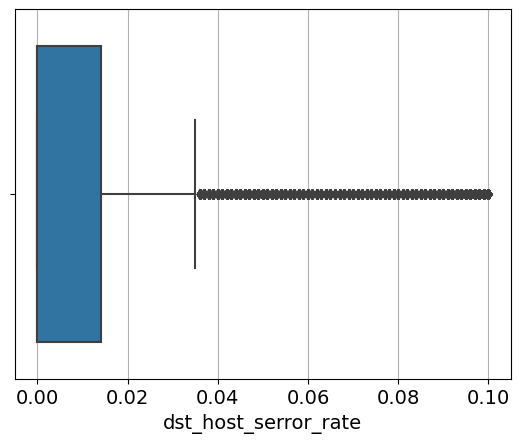

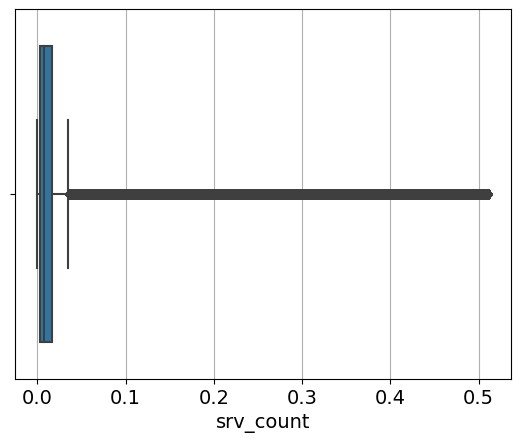

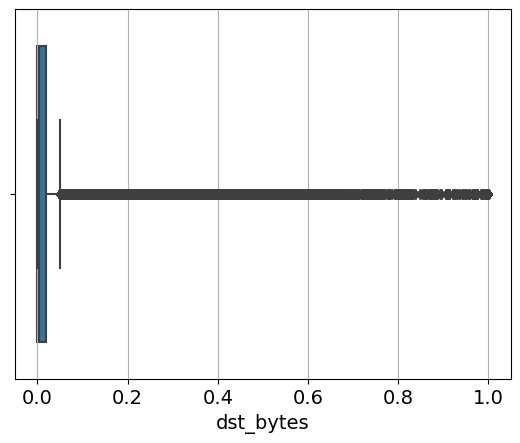

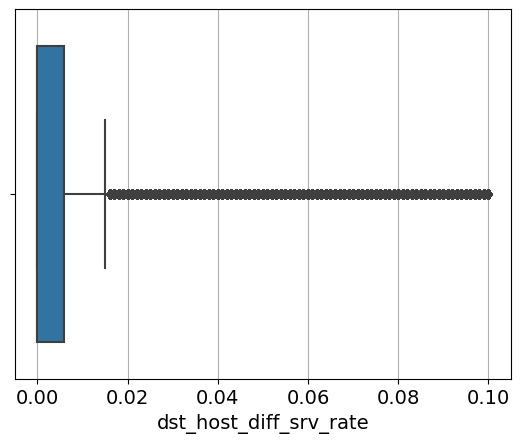

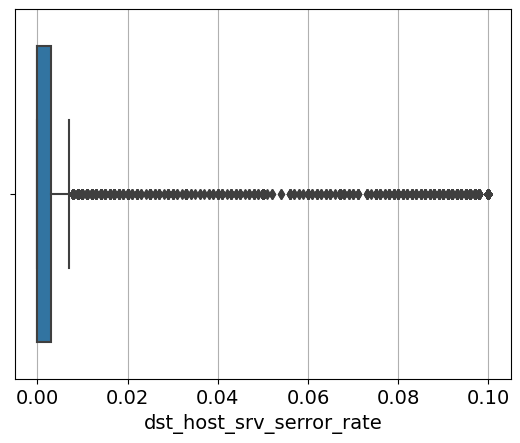

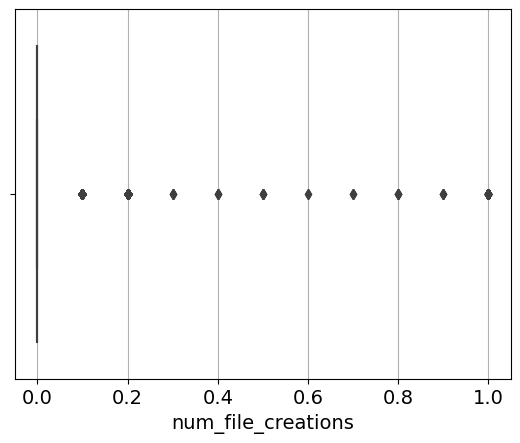

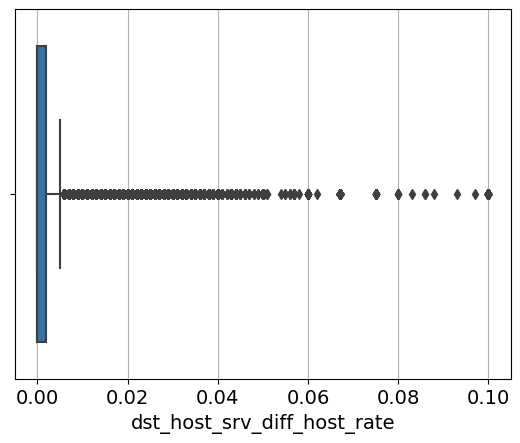

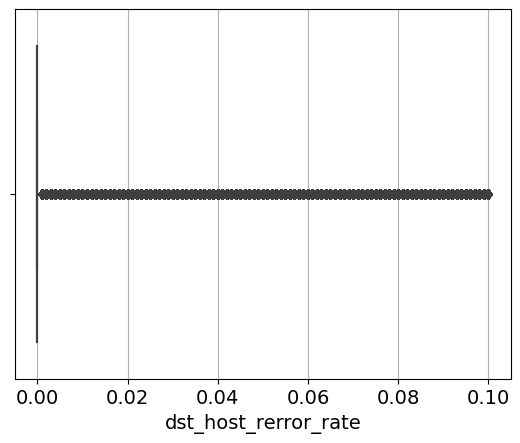

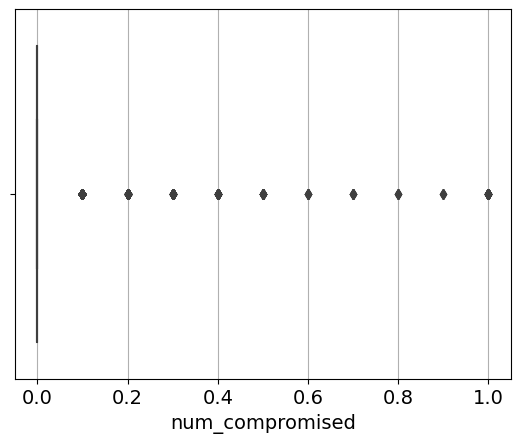

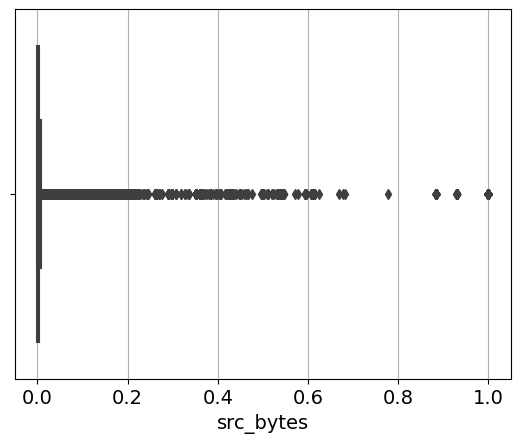

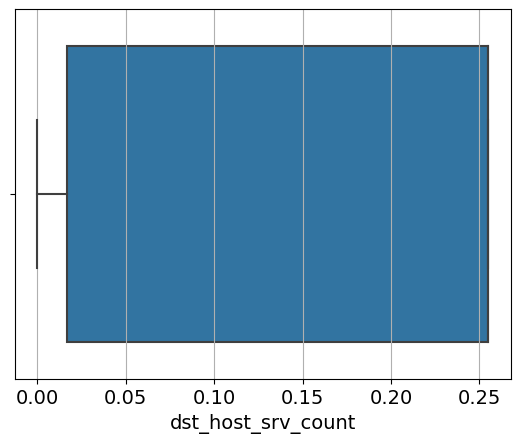

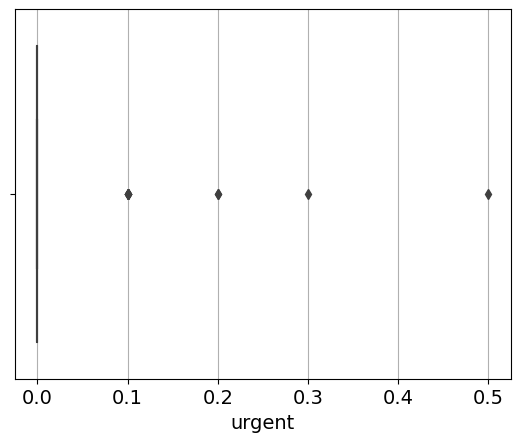

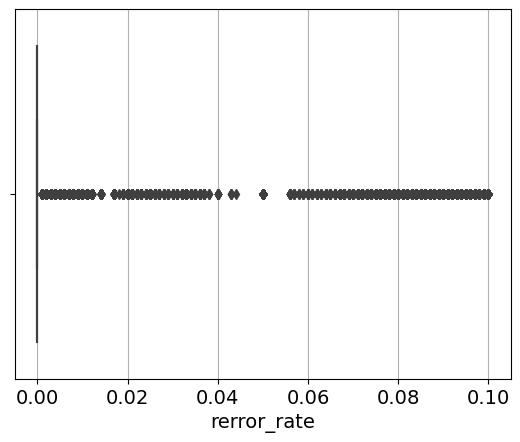

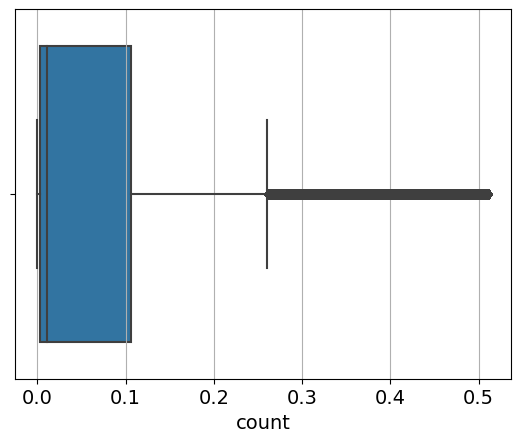

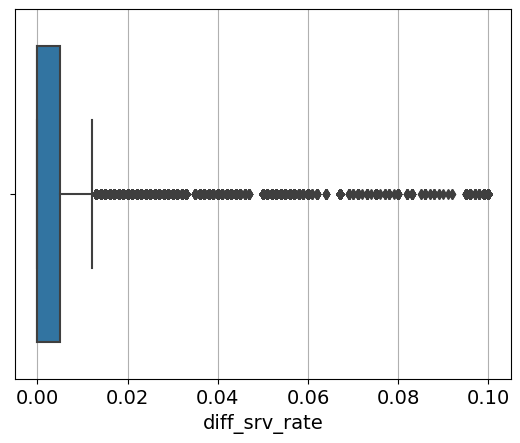

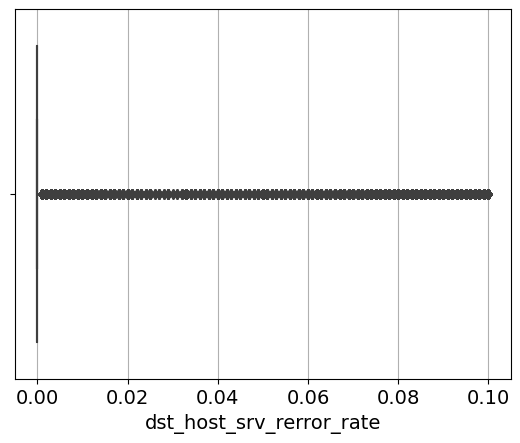

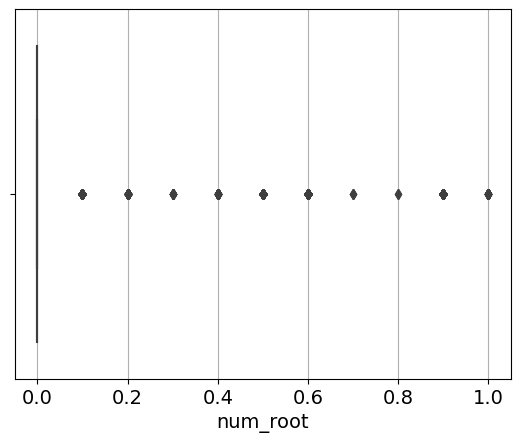

In [38]:
# Outlier Check
for i in Numcol:
    sns.boxplot(df[i])
    plt.show()

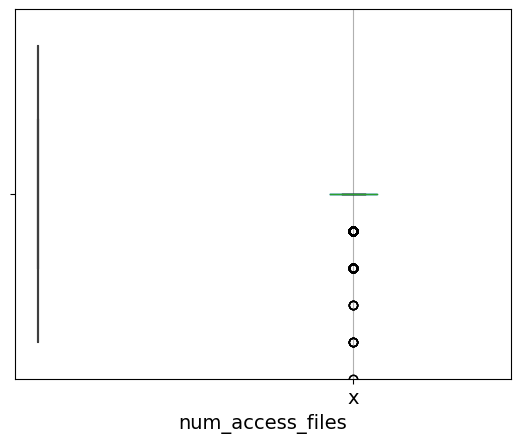

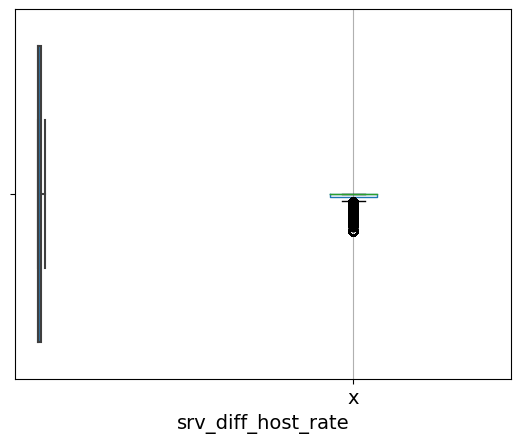

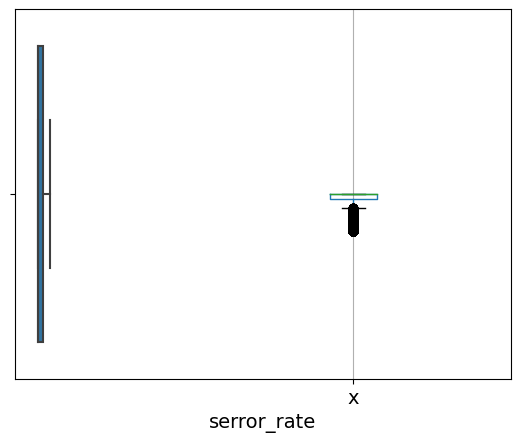

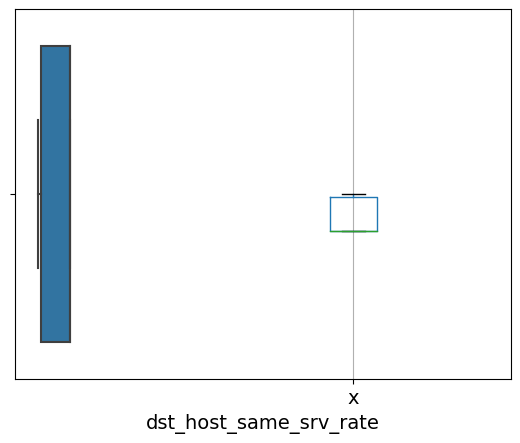

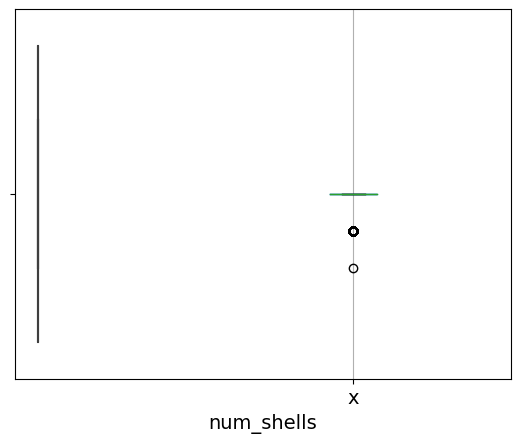

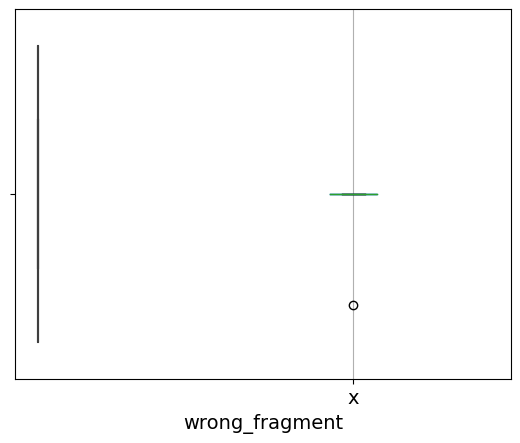

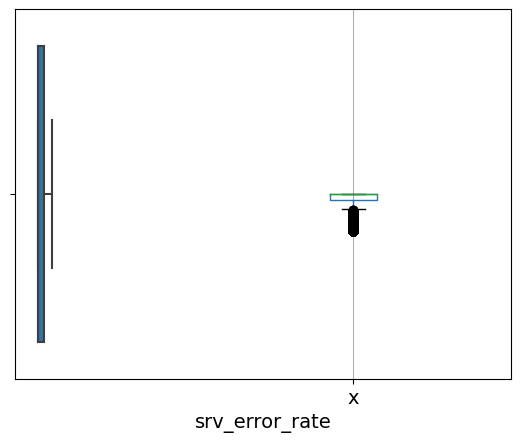

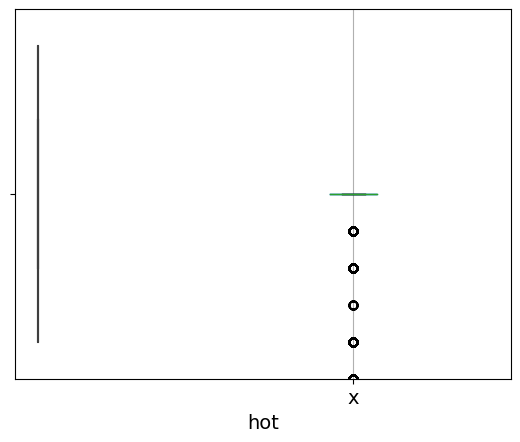

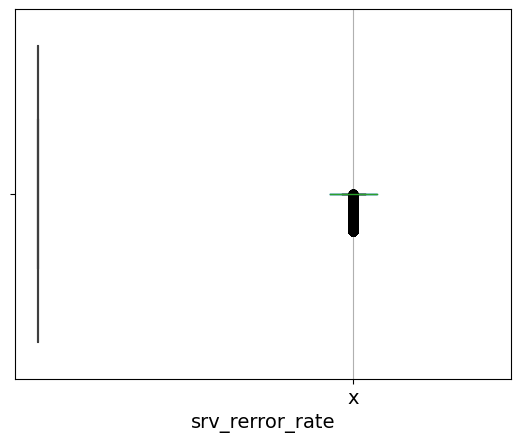

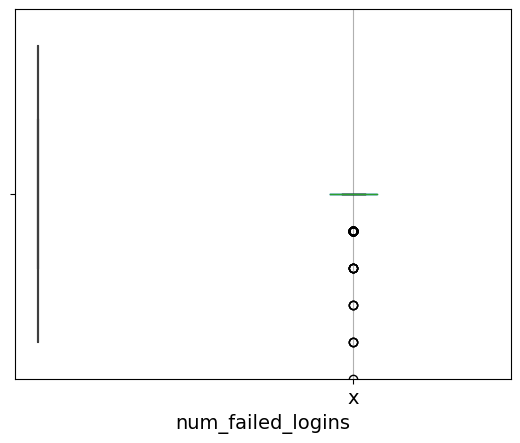

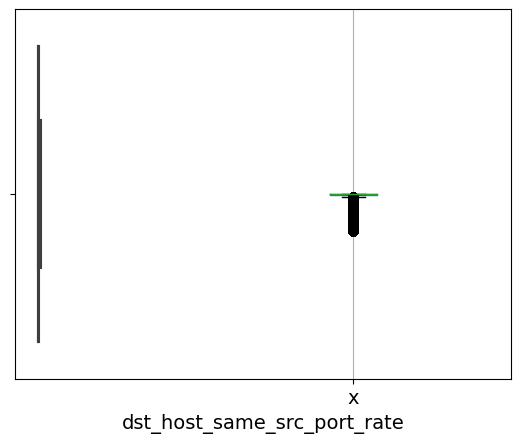

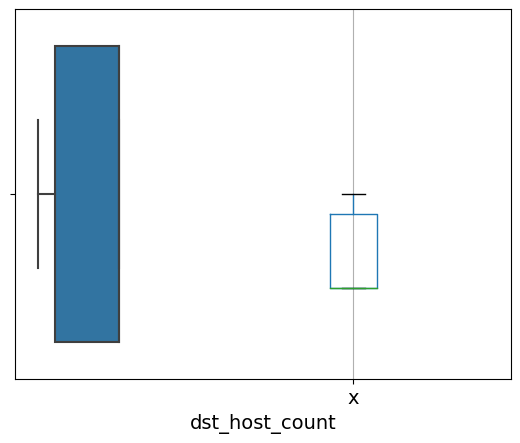

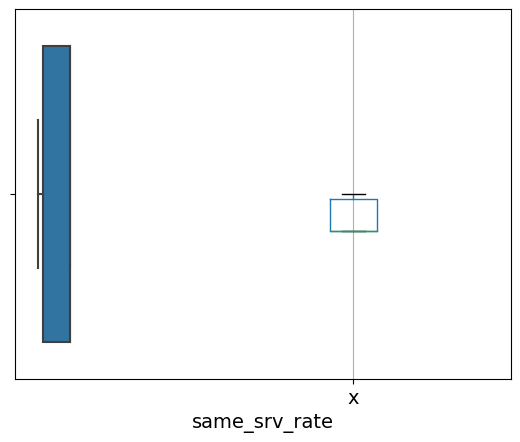

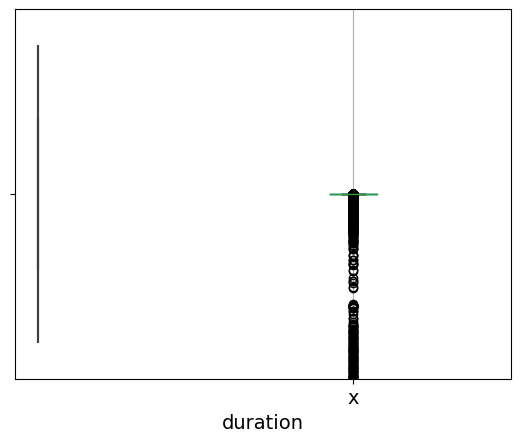

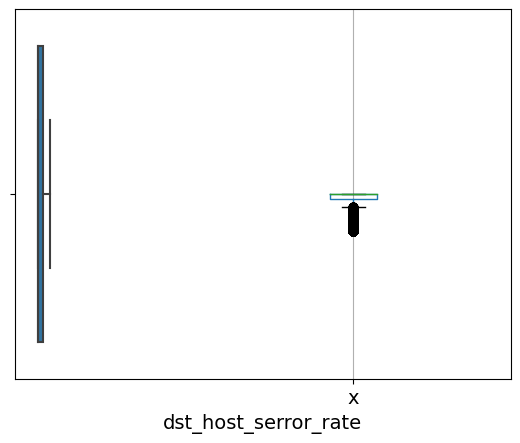

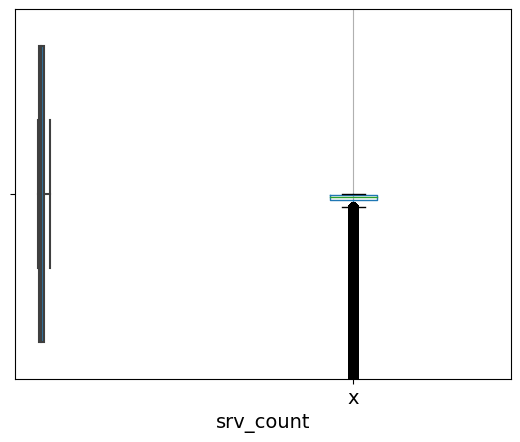

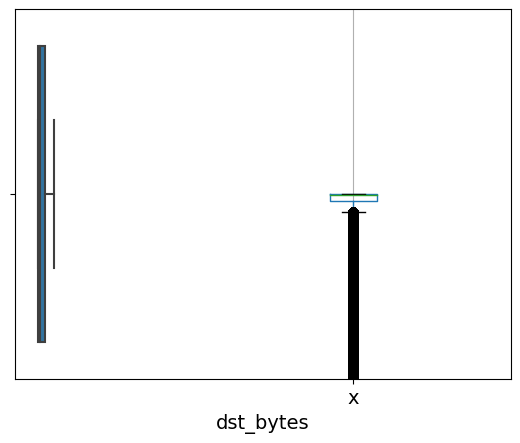

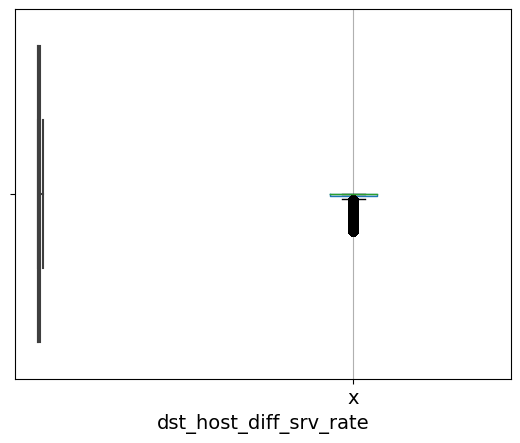

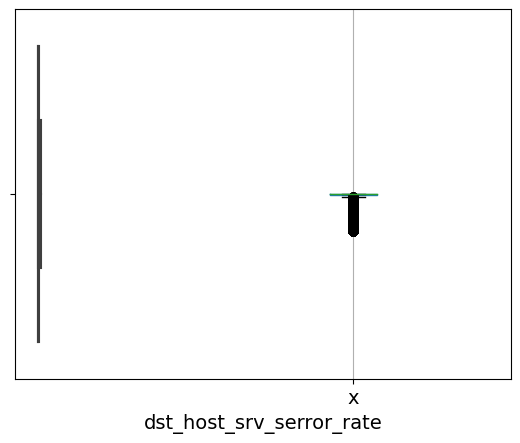

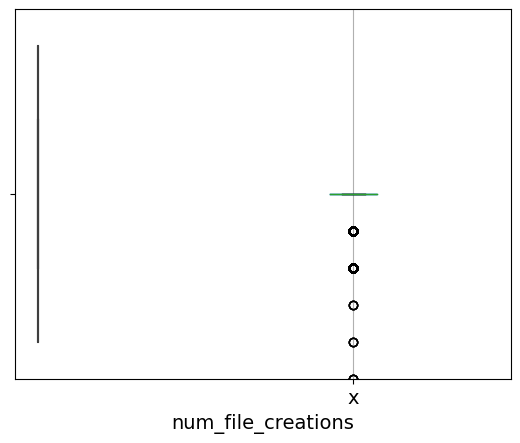

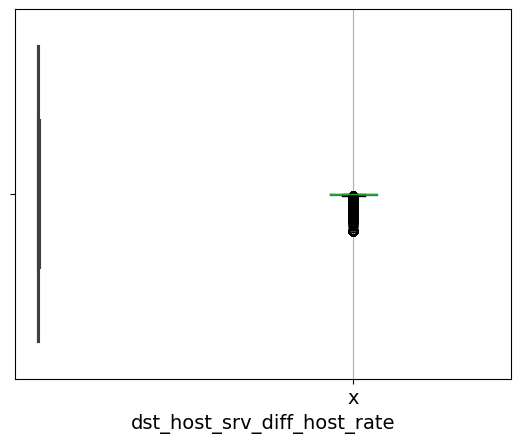

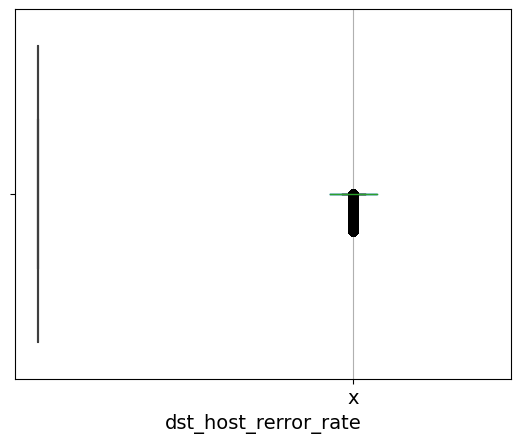

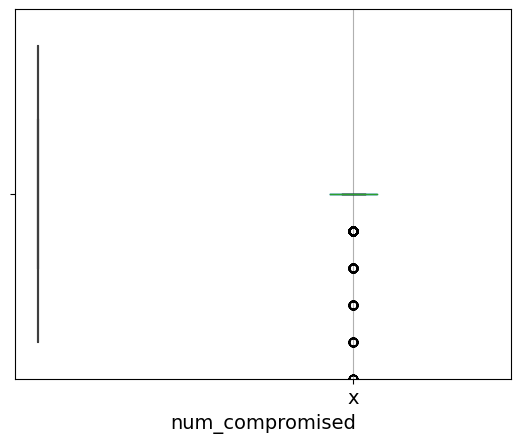

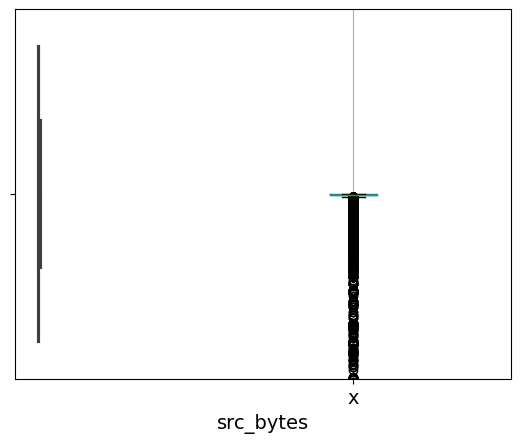

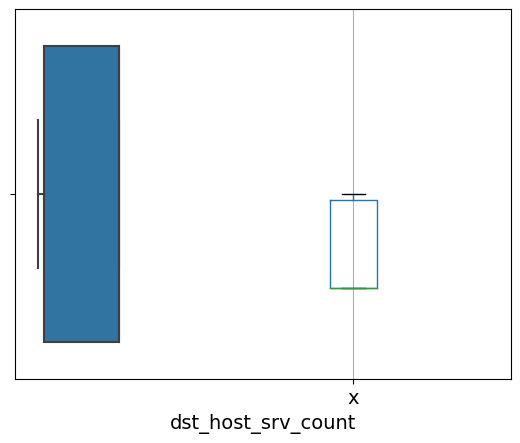

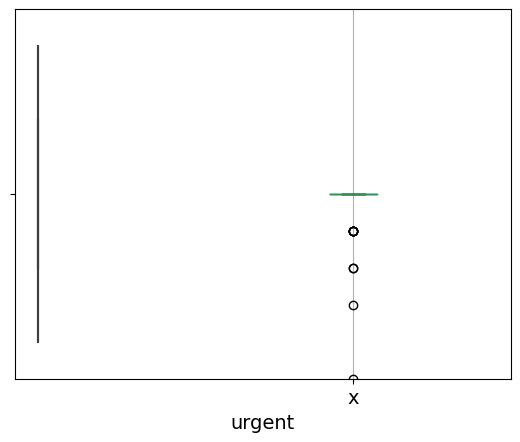

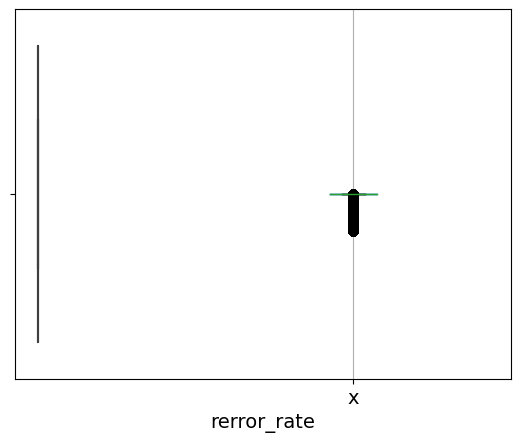

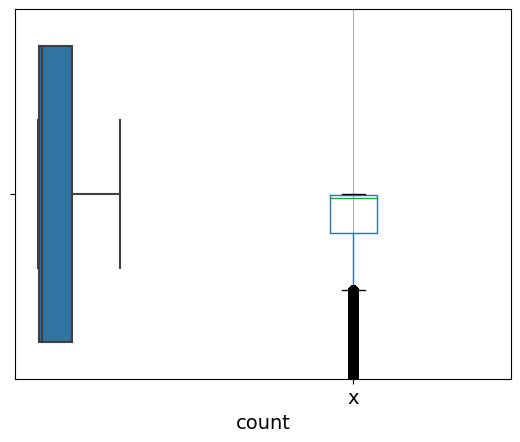

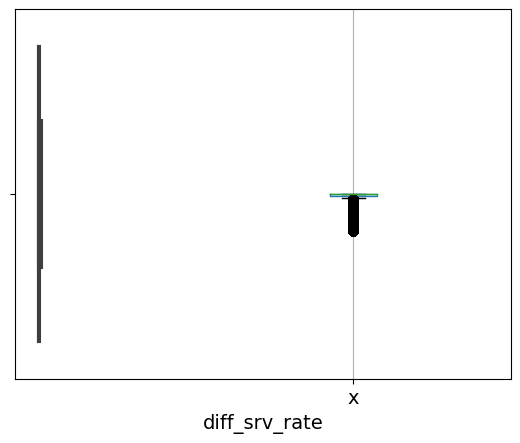

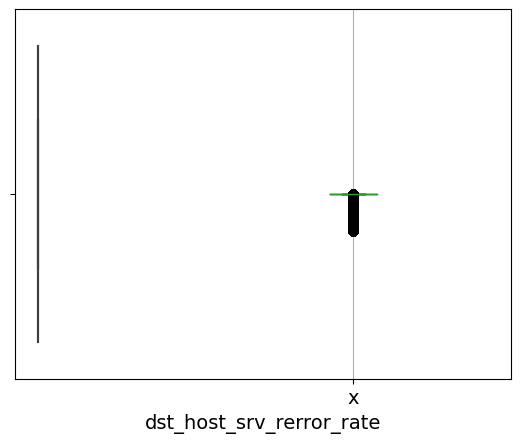

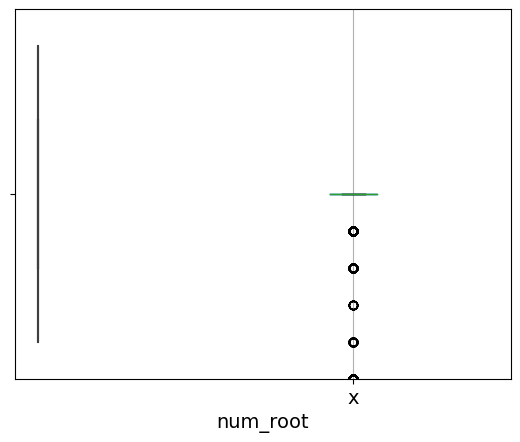

In [39]:
# Outlier treatment
for i in Numcol:
    _, bp = pd.DataFrame.boxplot(df[i], return_type='both')
    whiskers = [whiskers.get_ydata() for whiskers in bp["whiskers"]]
    df[i].clip(lower=whiskers[0][1],upper=whiskers[1][1],inplace=True)
    sns.boxplot(df[i])
    plt.show()

In [40]:
# Checking for low variance
l=[]
for i in Numcol:
    if len(df[i].unique()) <2:
        l.append(i)
        print(i,df[i].unique())
print(l)

num_access_files [0.]
num_shells [0.]
wrong_fragment [0.]
hot [0.]
srv_rerror_rate [0.]
num_failed_logins [0.]
duration [0.]
num_file_creations [0.]
dst_host_rerror_rate [0.]
num_compromised [0.]
urgent [0.]
rerror_rate [0.]
dst_host_srv_rerror_rate [0.]
num_root [0.]
['num_access_files', 'num_shells', 'wrong_fragment', 'hot', 'srv_rerror_rate', 'num_failed_logins', 'duration', 'num_file_creations', 'dst_host_rerror_rate', 'num_compromised', 'urgent', 'rerror_rate', 'dst_host_srv_rerror_rate', 'num_root']


In [41]:
# Refresh numerical columns
Numcol2=list(set(Numcol)-set(l))

In [42]:
# Drop unwanted columns
df.drop(l,axis=1,inplace=True)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 817543 entries, 0 to 817542
Data columns (total 27 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   protocol_type                817543 non-null  float64
 1   service                      817543 non-null  float64
 2   flag                         817543 non-null  float64
 3   src_bytes                    817543 non-null  float64
 4   dst_bytes                    817543 non-null  float64
 5   logged_in                    817543 non-null  float64
 6   root_shell                   817543 non-null  float64
 7   su_attempted                 817543 non-null  float64
 8   is_host_login                817543 non-null  float64
 9   is_guest_login               817543 non-null  float64
 10  count                        817543 non-null  float64
 11  srv_count                    817543 non-null  float64
 12  serror_rate                  817543 non-null  float64
 13 

In [44]:
# Dummy encoding Train & Test
data_new=pd.get_dummies(df, columns = Nomcol,drop_first = True)

In [45]:
data_new.columns

Index(['src_bytes', 'dst_bytes', 'logged_in', 'root_shell', 'su_attempted',
       'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate',
       ...
       'flag_0.01', 'flag_0.02', 'flag_0.03', 'flag_0.04', 'flag_0.05',
       'flag_0.06', 'flag_0.07', 'flag_0.08', 'flag_0.09', 'flag_0.1'],
      dtype='object', length=102)

In [76]:
data_new.columns = [col.replace('.', '_') for col in data_new.columns]

In [77]:
data_new.columns

Index(['src_bytes', 'dst_bytes', 'logged_in', 'root_shell', 'su_attempted',
       'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate',
       ...
       'flag_0_01', 'flag_0_02', 'flag_0_03', 'flag_0_04', 'flag_0_05',
       'flag_0_06', 'flag_0_07', 'flag_0_08', 'flag_0_09', 'flag_0_1'],
      dtype='object', length=102)

In [78]:
# Get Numerical df & cat df & Yn, Y..Then correlation heatmap
data_num=data_new.loc[:,Numcol2]

In [79]:
data_num.columns

Index(['dst_bytes', 'dst_host_diff_srv_rate', 'dst_host_srv_serror_rate',
       'srv_diff_host_rate', 'dst_host_srv_diff_host_rate', 'serror_rate',
       'dst_host_same_srv_rate', 'dst_host_srv_count', 'src_bytes',
       'srv_error_rate', 'dst_host_same_src_port_rate', 'count',
       'dst_host_count', 'diff_srv_rate', 'same_srv_rate',
       'dst_host_serror_rate', 'srv_count'],
      dtype='object')

<AxesSubplot:>

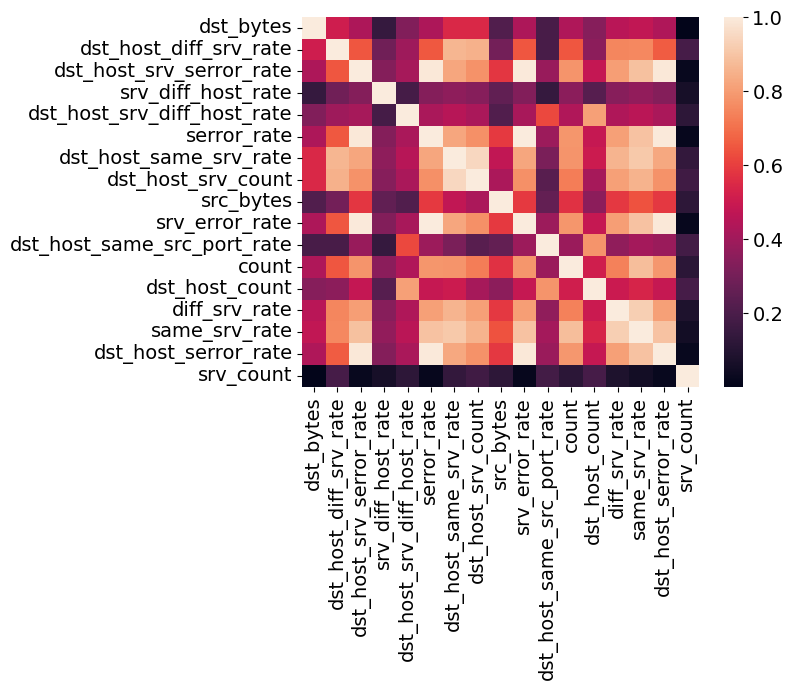

In [80]:
# visualize correlation matrix in Seaborn using a heatmap for Numerical columns
sns.heatmap(data_num.corr().abs())

In [81]:
# X vs Y - Numerical correlation
data_num.corrwith(data_new['B_Attack']).abs().sort_values(ascending=False)

same_srv_rate                  0.965934
dst_host_same_srv_rate         0.902940
diff_srv_rate                  0.894327
dst_host_serror_rate           0.888522
serror_rate                    0.886985
srv_error_rate                 0.885008
dst_host_srv_serror_rate       0.883174
count                          0.861522
dst_host_srv_count             0.854152
dst_host_diff_srv_rate         0.757746
src_bytes                      0.625420
dst_host_count                 0.537019
dst_bytes                      0.477381
dst_host_srv_diff_host_rate    0.465280
dst_host_same_src_port_rate    0.374825
srv_diff_host_rate             0.370791
srv_count                      0.015011
dtype: float64

In [83]:
data_num.columns

Index(['dst_bytes', 'dst_host_diff_srv_rate', 'dst_host_srv_serror_rate',
       'srv_diff_host_rate', 'dst_host_srv_diff_host_rate', 'serror_rate',
       'dst_host_same_srv_rate', 'dst_host_srv_count', 'src_bytes',
       'srv_error_rate', 'dst_host_same_src_port_rate', 'count',
       'dst_host_count', 'diff_srv_rate', 'same_srv_rate',
       'dst_host_serror_rate', 'srv_count'],
      dtype='object')

## Binomial classification

In [84]:
#### Univariate Regression
somerced_val = pd.DataFrame()
for i_var in data_num.columns:
    print(i_var)
    model = smf.logit('B_Attack~'+str(i_var), data=data_new).fit()
    somerce_d = 2*metrics.roc_auc_score(data_new.B_Attack, model.predict())-1
    temp = pd.DataFrame([i_var, somerce_d]).T
    somerced_val = pd.concat([somerced_val, temp], axis=0)

dst_bytes
Optimization terminated successfully.
         Current function value: 0.263816
         Iterations 12
dst_host_diff_srv_rate
Optimization terminated successfully.
         Current function value: 0.277802
         Iterations 8
dst_host_srv_serror_rate
Optimization terminated successfully.
         Current function value: 0.184800
         Iterations 10
srv_diff_host_rate
Optimization terminated successfully.
         Current function value: 0.501059
         Iterations 10
dst_host_srv_diff_host_rate
Optimization terminated successfully.
         Current function value: 0.417173
         Iterations 13
serror_rate
Optimization terminated successfully.
         Current function value: 0.179431
         Iterations 10
dst_host_same_srv_rate
Optimization terminated successfully.
         Current function value: 0.118437
         Iterations 10
dst_host_srv_count
Optimization terminated successfully.
         Current function value: 0.148214
         Iterations 10
src_bytes
Optimiza

In [85]:
imp_vars_SD = somerced_val.sort_values(1, ascending=False).head(15)

In [86]:
imp_vars_SD

,0,1
0,dst_host_same_srv_rate,0.969114
0,same_srv_rate,0.966449
0,dst_host_srv_count,0.960644
0,diff_srv_rate,0.950685
0,src_bytes,0.946658
0,count,0.945229
0,dst_bytes,0.92373
0,dst_host_diff_srv_rate,0.903742
0,dst_host_serror_rate,0.849771
0,serror_rate,0.849657


In [87]:
imp_vars_somerceD = list(imp_vars_SD[0].values)
imp_vars_somerceD

['dst_host_same_srv_rate',
 'same_srv_rate',
 'dst_host_srv_count',
 'diff_srv_rate',
 'src_bytes',
 'count',
 'dst_bytes',
 'dst_host_diff_srv_rate',
 'dst_host_serror_rate',
 'serror_rate',
 'srv_error_rate',
 'dst_host_srv_serror_rate',
 'dst_host_count',
 'dst_host_srv_diff_host_rate',
 'dst_host_same_src_port_rate']

In [88]:
classifier = RandomForestClassifier()

In [89]:
RFE_model = RFE(classifier,n_features_to_select=15).fit(data_num,data_new[['B_Attack']])

In [91]:
RFE_model.get_support()

array([ True,  True,  True, False,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True])

In [92]:
rfe = list(data_num.columns[RFE_model.get_support()])
rfe

['dst_bytes',
 'dst_host_diff_srv_rate',
 'dst_host_srv_serror_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_same_srv_rate',
 'dst_host_srv_count',
 'src_bytes',
 'srv_error_rate',
 'dst_host_same_src_port_rate',
 'count',
 'dst_host_count',
 'diff_srv_rate',
 'same_srv_rate',
 'dst_host_serror_rate',
 'srv_count']

In [93]:
#### Select K best
X = data_new[data_new.columns.difference(['B_Attack','M_Attack'])]
SKB = SelectKBest(f_classif, k=15).fit(X, data_new[['B_Attack']] )

In [94]:
SKB.get_support()
imp_vars_SKB = list(X.columns[SKB.get_support()])

In [95]:
imp_vars_SKB

['count',
 'diff_srv_rate',
 'dst_host_count',
 'dst_host_diff_srv_rate',
 'dst_host_same_srv_rate',
 'dst_host_serror_rate',
 'dst_host_srv_count',
 'dst_host_srv_serror_rate',
 'flag_0_07',
 'logged_in',
 'same_srv_rate',
 'serror_rate',
 'service_0_12',
 'src_bytes',
 'srv_error_rate']

In [96]:
#Final List (from Univariate, RFE, SelectKbest) 
fxy = list(set(imp_vars_SKB + imp_vars_somerceD + rfe ))
fxy

['srv_error_rate',
 'dst_host_count',
 'same_srv_rate',
 'dst_host_serror_rate',
 'srv_count',
 'dst_bytes',
 'logged_in',
 'service_0_12',
 'src_bytes',
 'count',
 'diff_srv_rate',
 'serror_rate',
 'dst_host_same_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_diff_srv_rate',
 'dst_host_srv_serror_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_srv_count',
 'flag_0_07']

In [97]:
#### VIF
feature=fxy.copy()
a=np.inf
while a>=5:
    vif=[variance_inflation_factor(data_new[feature].values,i) for i in range(data_new[feature].shape[1])]
    vif=pd.Series(vif,name='VIF')
    fet=pd.Series(data_new[feature].columns,name='Feature')
    vifdf=pd.concat([vif,fet],axis=1).sort_values(by="VIF")
    a=vifdf['VIF'].max()
    if a<=5:
        break
    feature=list(vifdf[:-1]["Feature"])
feature

['dst_bytes',
 'srv_count',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'src_bytes',
 'service_0_12',
 'dst_host_diff_srv_rate',
 'dst_host_srv_serror_rate',
 'count']

In [98]:
data_new.columns

Index(['src_bytes', 'dst_bytes', 'logged_in', 'root_shell', 'su_attempted',
       'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate',
       ...
       'flag_0_01', 'flag_0_02', 'flag_0_03', 'flag_0_04', 'flag_0_05',
       'flag_0_06', 'flag_0_07', 'flag_0_08', 'flag_0_09', 'flag_0_1'],
      dtype='object', length=102)

In [99]:
#split train and test
train_X, test_X, train_y, test_y = train_test_split(data_new[feature],
                                                 data_new['B_Attack'],
                                                  test_size = 0.2,
                                                  random_state = 123)

In [100]:
test_X.shape

(163509, 9)

In [101]:
train=pd.concat([train_X,train_y],axis=1)
test=pd.concat([test_X,test_y],axis=1)

In [102]:
train.columns

Index(['dst_bytes', 'srv_count', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'src_bytes', 'service_0_12',
       'dst_host_diff_srv_rate', 'dst_host_srv_serror_rate', 'count',
       'B_Attack'],
      dtype='object')

In [73]:

# Rename the columns to remove spaces
train.columns = [col.replace(' ', '_') for col in train.columns]
# Assuming your DataFrame is called 'train'
# Rename the column "service_0.12" to "service_0_12"
train = train.rename(columns={"service_0.12": "service_0_12"})

In [103]:
ta='B_Attack~'+'+'.join(feature)
ta

'B_Attack~dst_bytes+srv_count+dst_host_same_src_port_rate+dst_host_srv_diff_host_rate+src_bytes+service_0_12+dst_host_diff_srv_rate+dst_host_srv_serror_rate+count'

In [104]:
logreg = smf.logit(formula=ta, data=train)
result = logreg.fit()

Optimization terminated successfully.
         Current function value: 0.031641
         Iterations 14


In [105]:
print(result.summary2())

                                  Results: Logit
Model:                     Logit                 Pseudo R-squared:      0.948      
Dependent Variable:        B_Attack              AIC:                   41408.6169 
Date:                      2023-07-29 17:02      BIC:                   41522.5260 
No. Observations:          654034                Log-Likelihood:        -20694.    
Df Model:                  9                     LL-Null:               -3.9650e+05
Df Residuals:              654024                LLR p-value:           0.0000     
Converged:                 1.0000                Scale:                 1.0000     
No. Iterations:            14.0000                                                 
-----------------------------------------------------------------------------------
                              Coef.   Std.Err.     z     P>|z|    [0.025    0.975] 
-----------------------------------------------------------------------------------
Intercept                  

In [106]:
train_gini = 2*metrics.roc_auc_score(train['B_Attack'], result.predict(train)) - 1
print("The Gini Index for the model built on the Train Data is : ", train_gini)

test_gini = 2*metrics.roc_auc_score(test['B_Attack'], result.predict(test)) - 1
print("The Gini Index for the model built on the Test Data is : ", test_gini)

train_auc = metrics.roc_auc_score(train['B_Attack'], result.predict(train))
test_auc = metrics.roc_auc_score(test['B_Attack'], result.predict(test))

print("The AUC for the model built on the Train Data is : ", train_auc)
print("The AUC for the model built on the Test Data is : ", test_auc)

The Gini Index for the model built on the Train Data is :  0.9890761610623038
The Gini Index for the model built on the Test Data is :  0.9892120425680024
The AUC for the model built on the Train Data is :  0.9945380805311519
The AUC for the model built on the Test Data is :  0.9946060212840012


In [107]:
## Train Intuition behind ROC curve - predicted probability as a tool for separating the '1's and '0's
train_predicted_prob = pd.DataFrame(result.predict(train))
train_predicted_prob.columns = ['prob']
train_actual = train['B_Attack']
# making a DataFrame with actual and prob columns
train_predict = pd.concat([train_actual, train_predicted_prob], axis=1)
train_predict.columns = ['actual','prob']
train_predict.head()

,actual,prob
545255,0,0.005048
262009,0,0.001210
721479,0,0.008714
552506,0,0.002050
807203,1,0.999717


In [108]:
## Test Intuition behind ROC curve - predicted probability as a tool for separating the '1's and '0's
test_predicted_prob = pd.DataFrame(result.predict(test))
test_predicted_prob.columns = ['prob']
test_actual = test['B_Attack']
# making a DataFrame with actual and prob columns
test_predict = pd.concat([test_actual, test_predicted_prob], axis=1)
test_predict.columns = ['actual','prob']
test_predict.head()

,actual,prob
38266,1,1.000000
462637,0,0.000514
601383,0,0.005387
545687,0,0.000389
292802,0,0.004948


In [113]:
## Intuition behind ROC curve - confusion matrix for each different cut-off shows trade off in sensitivity and specificity
roc_like_df = pd.DataFrame()
train_temp = train_predict.copy()

for cut_off in np.linspace(0,1,50):
    train_temp['cut_off'] = cut_off
    train_temp['predicted'] = train_temp['prob'].apply(lambda x: 0.0 if x < cut_off else 1.0)
    train_temp['tp'] = train_temp.apply(lambda x: 1.0 if x['actual']==1.0 and x['predicted']==1 else 0.0, axis=1)
    train_temp['fp'] = train_temp.apply(lambda x: 1.0 if x['actual']==0.0 and x['predicted']==1 else 0.0, axis=1)
    train_temp['tn'] = train_temp.apply(lambda x: 1.0 if x['actual']==0.0 and x['predicted']==0 else 0.0, axis=1)
    train_temp['fn'] = train_temp.apply(lambda x: 1.0 if x['actual']==1.0 and x['predicted']==0 else 0.0, axis=1)
    sensitivity = train_temp['tp'].sum() / (train_temp['tp'].sum() + train_temp['fn'].sum())
    specificity = train_temp['tn'].sum() / (train_temp['tn'].sum() + train_temp['fp'].sum())
    accuracy = (train_temp['tp'].sum()  + train_temp['tn'].sum() ) / (train_temp['tp'].sum() + train_temp['fn'].sum() + train_temp['tn'].sum() + train_temp['fp'].sum())
    roc_like_table = pd.DataFrame([cut_off, sensitivity, specificity, accuracy]).T
    roc_like_table.columns = ['cutoff', 'sensitivity', 'specificity', 'accuracy']
    roc_like_df = pd.concat([roc_like_df, roc_like_table], axis=0)

In [114]:
roc_like_df.head()

,cutoff,sensitivity,specificity,accuracy
0,0.000000,1.000000,0.000000,0.294621
0,0.020408,0.990690,0.943658,0.957514
0,0.040816,0.990171,0.968332,0.974766
0,0.061224,0.989839,0.977559,0.981177
0,0.081633,0.989605,0.984183,0.985781


In [122]:
## Finding ideal cut-off for checking if this remains same in OOS validation
roc_like_df['total'] = roc_like_df['sensitivity'] + roc_like_df['specificity']

In [123]:
roc_like_df.head()

,cutoff,sensitivity,specificity,accuracy,total
0,0.000000,1.000000,0.000000,0.294621,1.000000
0,0.020408,0.990690,0.943658,0.957514,1.934348
0,0.040816,0.990171,0.968332,0.974766,1.958502
0,0.061224,0.989839,0.977559,0.981177,1.967398
0,0.081633,0.989605,0.984183,0.985781,1.973788


In [117]:
#Cut-off based on highest sum(sensitivity+specicity)   - common way of identifying cut-off
roc_like_df[roc_like_df['total']==roc_like_df['total'].max()]

,cutoff,sensitivity,specificity,accuracy,total
0,0.22449,0.988079,0.993166,0.991667,1.981245


In [118]:
#Cut-off based on highest accuracy   - some teams use this as methodology to decide the cut-off
roc_like_df[roc_like_df['accuracy']==roc_like_df['accuracy'].max()]

,cutoff,sensitivity,specificity,accuracy,total
0,0.755102,0.975235,0.999402,0.992282,1.974637


In [119]:
#Cut-off based on highest sensitivity
roc_like_df[roc_like_df['sensitivity']==roc_like_df['sensitivity'].max()]

,cutoff,sensitivity,specificity,accuracy,total
0,0.0,1.0,0.0,0.294621,1.0


In [124]:
#Choosen Best Cut-off is 0.428571 based on highest (sensitivity+specicity)

test_predict['predicted'] = test_predict['prob'].apply(lambda x: 1 if x > 0.755102 else 0)
train_predict['predicted'] = train_predict['prob'].apply(lambda x: 1 if x > 0.755102 else 0)

In [125]:
train_predict.head()

,actual,prob,predicted
545255,0,0.005048,0
262009,0,0.001210,0
721479,0,0.008714,0
552506,0,0.002050,0
807203,1,0.999717,1


In [126]:
print("The overall accuracy score for the Train Data is : ", metrics.accuracy_score(train_predict.actual, train_predict.predicted))
print("The overall accuracy score for the Test Data  is : ", metrics.accuracy_score(test_predict.actual, test_predict.predicted))

The overall accuracy score for the Train Data is :  0.9922817468205016
The overall accuracy score for the Test Data  is :  0.9924346672048633


In [127]:
print(metrics.classification_report(train_predict.actual, train_predict.predicted))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99    461342
           1       1.00      0.98      0.99    192692

    accuracy                           0.99    654034
   macro avg       0.99      0.99      0.99    654034
weighted avg       0.99      0.99      0.99    654034



In [128]:
print(metrics.classification_report(test_predict.actual, test_predict.predicted))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99    115368
           1       1.00      0.98      0.99     48141

    accuracy                           0.99    163509
   macro avg       0.99      0.99      0.99    163509
weighted avg       0.99      0.99      0.99    163509



### Binomial Modeling - Logistic ML

In [129]:
#Build the model
model = LogisticRegression()
model = model.fit(train_X, train_y)

In [130]:
#Train probability
LR_Trainprob=pd.DataFrame(model.predict_proba(train_X), index=train_X.index)[1]

In [131]:
#Test probability
LR_Testprob=pd.DataFrame(model.predict_proba(test_X),index=test_X.index)[1]

In [132]:
# Best threshold
fpr1a, tpr1a, thres1a=metrics.roc_curve(train_y, LR_Trainprob)
cutoff1a=thres1a[np.argmax(tpr1a-fpr1a)]

cutoff1a

0.04718204990944092

In [133]:
# Train predict
LR_Trainpred=LR_Trainprob.apply(lambda x: 1 if x > 0.04718204990944092 else 0)

In [134]:
# Test predict
LR_Testpred=LR_Testprob.apply(lambda x: 1 if x > 0.04718204990944092 else 0)

In [135]:
# Train Confusion matrix
confusion_matrix(train_y,LR_Trainpred)

array([[454933,   6409],
       [  2520, 190172]], dtype=int64)

In [136]:
# Test Confusion matrix
confusion_matrix(test_y,LR_Testpred)

array([[113745,   1623],
       [   620,  47521]], dtype=int64)

In [137]:
# Train Classification report
print(metrics.classification_report(train_y,LR_Trainpred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99    461342
           1       0.97      0.99      0.98    192692

    accuracy                           0.99    654034
   macro avg       0.98      0.99      0.98    654034
weighted avg       0.99      0.99      0.99    654034



In [138]:
# Test Classification report
print(metrics.classification_report(test_y,LR_Testpred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99    115368
           1       0.97      0.99      0.98     48141

    accuracy                           0.99    163509
   macro avg       0.98      0.99      0.98    163509
weighted avg       0.99      0.99      0.99    163509



### Binomial Modeling - KNN

In [139]:
#Standardization of data
sc = StandardScaler()
std_data = sc.fit_transform(train_X)

In [140]:
std_data_train = pd.DataFrame(std_data, columns=train_X.columns, index = train_X.index )
std_data_test = pd.DataFrame(sc.transform(test_X), columns=test_X.columns, index = test_X.index )

In [141]:
model2 = KNeighborsClassifier().fit(std_data_train, train_y)

In [142]:
train_pred = model.predict(std_data_train)
test_pred = model.predict(std_data_test)

In [143]:
# Train Confusion matrix
confusion_matrix(train_y,train_pred)

array([[426407,  34935],
       [  3893, 188799]], dtype=int64)

In [147]:
# Test Confusion matrix
#confusion_matrix(train_y,test_pred)

In [145]:
print(metrics.classification_report(train_y, train_pred))

              precision    recall  f1-score   support

           0       0.99      0.92      0.96    461342
           1       0.84      0.98      0.91    192692

    accuracy                           0.94    654034
   macro avg       0.92      0.95      0.93    654034
weighted avg       0.95      0.94      0.94    654034



In [146]:
print(metrics.classification_report(test_y, test_pred))

              precision    recall  f1-score   support

           0       0.99      0.92      0.96    115368
           1       0.84      0.98      0.91     48141

    accuracy                           0.94    163509
   macro avg       0.92      0.95      0.93    163509
weighted avg       0.95      0.94      0.94    163509



### Binomial Modelling - DT

In [148]:
param_grid = {'max_depth': np.arange(3, 5),
             'max_features': np.arange(3,5)}

In [149]:
tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 5)
tree.fit( train_X, train_y )

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': array([3, 4]),
                         'max_features': array([3, 4])})

In [150]:
tree.best_score_

0.996105707795478

In [151]:
tree.best_estimator_

DecisionTreeClassifier(max_depth=4, max_features=3)

In [152]:
dt_trainpred=tree.predict(train_X)

In [153]:
dt_testpred=tree.predict(test_X)

In [154]:
# Train Confusion matrix
confusion_matrix(train_y,dt_trainpred)

array([[461064,    278],
       [  3356, 189336]], dtype=int64)

In [155]:
# Test Confusion matrix
confusion_matrix(test_y,dt_testpred)

array([[115296,     72],
       [   895,  47246]], dtype=int64)

In [156]:
print(metrics.classification_report(train_y, dt_trainpred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00    461342
           1       1.00      0.98      0.99    192692

    accuracy                           0.99    654034
   macro avg       1.00      0.99      0.99    654034
weighted avg       0.99      0.99      0.99    654034



In [157]:
print(metrics.classification_report(test_y, dt_testpred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00    115368
           1       1.00      0.98      0.99     48141

    accuracy                           0.99    163509
   macro avg       1.00      0.99      0.99    163509
weighted avg       0.99      0.99      0.99    163509



## Multinomial Classification

### Feature selection

In [159]:
classifier = RandomForestClassifier()

In [160]:
RFE_model = RFE(classifier,n_features_to_select=15).fit(data_num,data_new[['M_Attack']])

In [161]:
RFE_model.get_support()

array([ True,  True,  True, False, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True])

In [167]:
imp_vars_RFE = list(data_num.columns[RFE_model.get_support()])
imp_vars_RFE

['dst_bytes',
 'dst_host_diff_srv_rate',
 'dst_host_srv_serror_rate',
 'serror_rate',
 'dst_host_same_srv_rate',
 'dst_host_srv_count',
 'src_bytes',
 'srv_error_rate',
 'dst_host_same_src_port_rate',
 'count',
 'dst_host_count',
 'diff_srv_rate',
 'same_srv_rate',
 'dst_host_serror_rate',
 'srv_count']

In [164]:
#### Select K best
X = data_new[data_new.columns.difference(['B_Attack','M_Attack'])]
SKB = SelectKBest(f_classif, k=15).fit(X, data_new[['M_Attack']] )

In [165]:
SKB.get_support()
imp_vars_SKB = list(X.columns[SKB.get_support()])

In [166]:
imp_vars_SKB

['count',
 'diff_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_srv_rate',
 'dst_host_serror_rate',
 'dst_host_srv_count',
 'dst_host_srv_serror_rate',
 'flag_0_07',
 'logged_in',
 'protocol_type_0_02',
 'same_srv_rate',
 'serror_rate',
 'service_0_09',
 'service_0_12',
 'srv_error_rate']

In [168]:
#Final List (from RFE, SelectKbest) 
fxy = list(set(imp_vars_SKB + imp_vars_RFE))
fxy

['srv_error_rate',
 'dst_host_count',
 'same_srv_rate',
 'dst_host_serror_rate',
 'srv_count',
 'dst_bytes',
 'logged_in',
 'service_0_12',
 'src_bytes',
 'count',
 'diff_srv_rate',
 'service_0_09',
 'serror_rate',
 'dst_host_same_srv_rate',
 'dst_host_same_src_port_rate',
 'protocol_type_0_02',
 'dst_host_diff_srv_rate',
 'dst_host_srv_serror_rate',
 'dst_host_srv_count',
 'flag_0_07']

In [169]:
#### VIF
feature=fxy.copy()
a=np.inf
while a>=2:
    vif=[variance_inflation_factor(data_new[feature].values,i) for i in range(data_new[feature].shape[1])]
    vif=pd.Series(vif,name='VIF')
    fet=pd.Series(data_new[feature].columns,name='Feature')
    vifdf=pd.concat([vif,fet],axis=1).sort_values(by="VIF")
    a=vifdf['VIF'].max()
    if a<=2:
        break
    feature=list(vifdf[:-1]["Feature"])
feature

['service_0_12',
 'dst_host_same_src_port_rate',
 'dst_bytes',
 'srv_count',
 'src_bytes',
 'service_0_09']

In [170]:
#split train and test
train_X, test_X, train_y, test_y = train_test_split(data_new[feature],
                                                 data_new['M_Attack'],
                                                  test_size = 0.2,
                                                  random_state = 123)

In [171]:
train=pd.concat([train_X,train_y],axis=1)
test=pd.concat([test_X,test_y],axis=1)

In [172]:
train.columns

Index(['service_0_12', 'dst_host_same_src_port_rate', 'dst_bytes', 'srv_count',
       'src_bytes', 'service_0_09', 'M_Attack'],
      dtype='object')

### Multinomial Modelling - Bagging

In [173]:
pargrid_ada = {'n_estimators': [50, 60, 70, 80, 90, 100]}

gscv_bagging = GridSearchCV(estimator=BaggingClassifier(), 
                        param_grid=pargrid_ada, 
                        cv=5,
                        verbose=True, n_jobs=-1)

In [175]:
gscv_results = gscv_bagging.fit(train_X, train_y) 

Fitting 5 folds for each of 6 candidates, totalling 30 fits


In [176]:
gscv_results.best_params_

{'n_estimators': 100}

In [177]:
gscv_results.best_score_

0.9938489436281668

In [178]:
# Train predict
bagtrain=gscv_results.predict(train_X)

In [179]:
# Test predict
bagtest=gscv_results.predict(test_X)

In [180]:
# Train Confusion matrix
confusion_matrix(train_y,bagtrain)

array([[461092,      6,      0,      0,    232,      7,      1,      0,
             4,      0],
       [    39,    725,      0,      0,      0,      0,      0,      0,
             0,      0],
       [     1,      0,     24,      0,      0,      0,      0,      0,
             0,      0],
       [     0,      0,      0,     46,      0,      0,      0,      0,
             0,      0],
       [   200,      0,      0,      0, 181582,      0,     32,      0,
             0,      0],
       [    45,      0,      0,      0,      0,   1033,    198,      0,
             0,      0],
       [   428,      0,      1,      0,     22,      3,   1816,      0,
           102,      0],
       [     1,      0,      0,      0,      0,      0,      0,      2,
             0,      0],
       [    56,      0,      0,      0,   2485,      0,     55,      0,
          1414,      0],
       [     0,      0,      0,      0,      0,      0,      0,      0,
             0,   2382]], dtype=int64)

In [181]:
# Test Confusion matrix
confusion_matrix(test_y,bagtest)

array([[115304,      2,      0,      0,     59,      2,      1,      0,
             0,      0],
       [     9,    195,      0,      0,      0,      0,      0,      0,
             0,      0],
       [     3,      0,      2,      0,      0,      0,      0,      0,
             0,      0],
       [     1,      0,      0,      6,      0,      0,      0,      0,
             0,      0],
       [    44,      0,      0,      0,  45360,      0,     10,      0,
             0,      0],
       [     9,      0,      0,      0,      0,    223,     46,      0,
             0,      0],
       [    96,      0,      0,      0,      3,      1,    465,      0,
            27,      0],
       [     6,      0,      1,      0,      0,      0,      0,      0,
             0,      0],
       [    14,      0,      0,      0,    621,      0,     10,      0,
           364,      0],
       [     0,      0,      0,      0,      0,      0,      0,      0,
             0,    625]], dtype=int64)

In [182]:
print(metrics.classification_report(train_y, bagtrain))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    461342
           1       0.99      0.95      0.97       764
           2       0.96      0.96      0.96        25
           3       1.00      1.00      1.00        46
           4       0.99      1.00      0.99    181814
           5       0.99      0.81      0.89      1276
           6       0.86      0.77      0.81      2372
           7       1.00      0.67      0.80         3
           8       0.93      0.35      0.51      4010
           9       1.00      1.00      1.00      2382

    accuracy                           0.99    654034
   macro avg       0.97      0.85      0.89    654034
weighted avg       0.99      0.99      0.99    654034



In [183]:
print(metrics.classification_report(test_y, bagtest))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    115368
           1       0.99      0.96      0.97       204
           2       0.67      0.40      0.50         5
           3       1.00      0.86      0.92         7
           4       0.99      1.00      0.99     45414
           5       0.99      0.80      0.88       278
           6       0.87      0.79      0.83       592
           7       0.00      0.00      0.00         7
           8       0.93      0.36      0.52      1009
           9       1.00      1.00      1.00       625

    accuracy                           0.99    163509
   macro avg       0.84      0.72      0.76    163509
weighted avg       0.99      0.99      0.99    163509



### Multinomial Modelling - Random Forest

In [184]:
radm_clf = RandomForestClassifier(oob_score=True,n_estimators=100 , max_features=6, n_jobs=-1)
radm_clf.fit( train_X, train_y )

RandomForestClassifier(max_features=6, n_jobs=-1, oob_score=True)

In [185]:
# Train predict
rftrain=radm_clf.predict(train_X)

In [186]:
# Test predict
rftest=radm_clf.predict(test_X)

In [187]:
# Train Confusion matrix
confusion_matrix(train_y,rftrain)

array([[461089,      6,      0,      0,    235,      7,      1,      0,
             4,      0],
       [    39,    725,      0,      0,      0,      0,      0,      0,
             0,      0],
       [     1,      0,     24,      0,      0,      0,      0,      0,
             0,      0],
       [     0,      0,      0,     46,      0,      0,      0,      0,
             0,      0],
       [   197,      0,      0,      0, 181585,      0,     32,      0,
             0,      0],
       [    45,      0,      0,      0,      0,   1033,    198,      0,
             0,      0],
       [   428,      0,      1,      0,     22,      3,   1816,      0,
           102,      0],
       [     1,      0,      0,      0,      0,      0,      0,      2,
             0,      0],
       [    56,      0,      0,      0,   2485,      0,     55,      0,
          1414,      0],
       [     0,      0,      0,      0,      0,      0,      0,      0,
             0,   2382]], dtype=int64)

In [188]:
# Test Confusion matrix
confusion_matrix(test_y,rftest)

array([[115304,      2,      0,      0,     59,      2,      1,      0,
             0,      0],
       [     9,    195,      0,      0,      0,      0,      0,      0,
             0,      0],
       [     3,      0,      2,      0,      0,      0,      0,      0,
             0,      0],
       [     1,      0,      0,      6,      0,      0,      0,      0,
             0,      0],
       [    46,      0,      0,      0,  45358,      0,     10,      0,
             0,      0],
       [     9,      0,      0,      0,      0,    223,     46,      0,
             0,      0],
       [    96,      0,      0,      0,      3,      1,    465,      0,
            27,      0],
       [     6,      0,      1,      0,      0,      0,      0,      0,
             0,      0],
       [    14,      0,      0,      0,    621,      0,     10,      0,
           364,      0],
       [     0,      0,      0,      0,      0,      0,      0,      0,
             0,    625]], dtype=int64)

In [189]:
print(metrics.classification_report(train_y, rftrain))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    461342
           1       0.99      0.95      0.97       764
           2       0.96      0.96      0.96        25
           3       1.00      1.00      1.00        46
           4       0.99      1.00      0.99    181814
           5       0.99      0.81      0.89      1276
           6       0.86      0.77      0.81      2372
           7       1.00      0.67      0.80         3
           8       0.93      0.35      0.51      4010
           9       1.00      1.00      1.00      2382

    accuracy                           0.99    654034
   macro avg       0.97      0.85      0.89    654034
weighted avg       0.99      0.99      0.99    654034



In [190]:
print(metrics.classification_report(test_y, rftest))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    115368
           1       0.99      0.96      0.97       204
           2       0.67      0.40      0.50         5
           3       1.00      0.86      0.92         7
           4       0.99      1.00      0.99     45414
           5       0.99      0.80      0.88       278
           6       0.87      0.79      0.83       592
           7       0.00      0.00      0.00         7
           8       0.93      0.36      0.52      1009
           9       1.00      1.00      1.00       625

    accuracy                           0.99    163509
   macro avg       0.84      0.72      0.76    163509
weighted avg       0.99      0.99      0.99    163509

